# Collecting the data

In [5]:
# import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [6]:
# read the data from .csv file

titanic_df= pd.read_csv("titanic.csv")
type(titanic_df)

pandas.core.frame.DataFrame

In [7]:
# read and display first 10 rows

titanic_df.head(10)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


# Analysing the data 

In [8]:
# findthe nos of columns and rows in the dataframe
titanic_df.shape

# Inference there are 887 rows (passengers) and 8 column(features)

(887, 8)

In [9]:
# get information about the differnt columns in the dataframe and the missing values 

titanic_df.info()

# Inference 
#1. There are no columns with  missing or  null values 
# 2. The sex column is a categorical column  and we need to convert the value to a boolean. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [10]:
# Check for null or missing values in all the column
titanic_df.isnull().sum()

#Inference : None of the columns(features) have any null values.

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:>

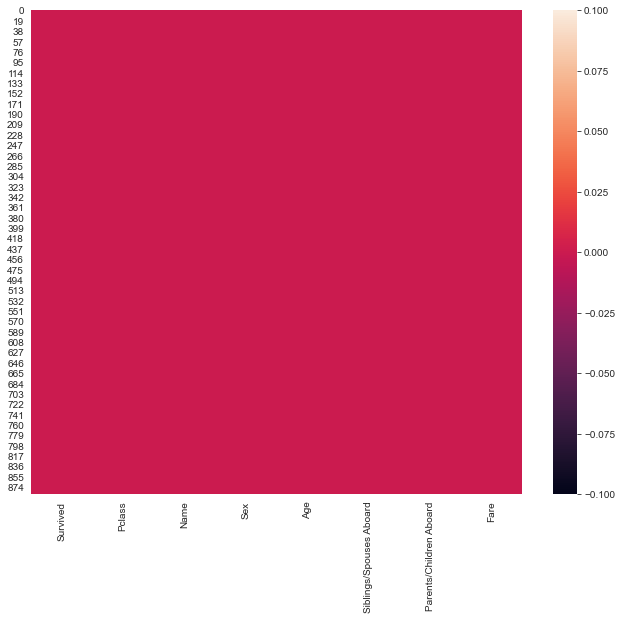

In [60]:
# heat map to find the null values in the column

sns.heatmap(titanic_df.isnull())

#Inference : No  null values in any column as per the heat map

<AxesSubplot:xlabel='Survived', ylabel='count'>

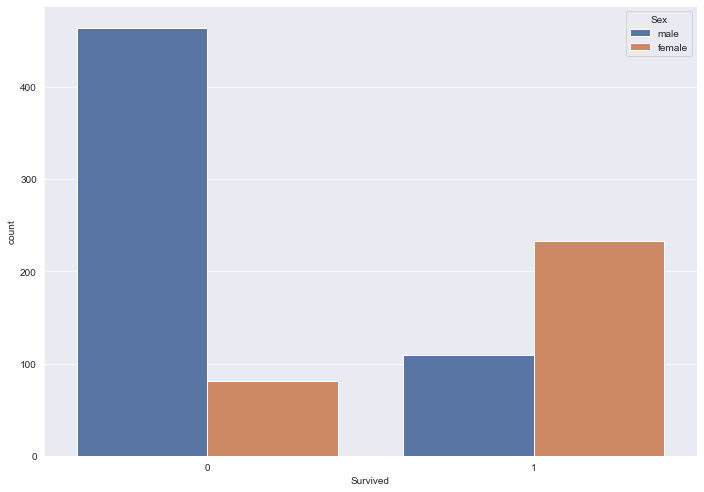

In [14]:
# countplot for survive and sex
sns.set({'figure.figsize':(11.7,8.27)})

sns.countplot(x="Survived", hue="Sex", data=titanic_df)

# Inference : More number of males died than female or more number of females survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

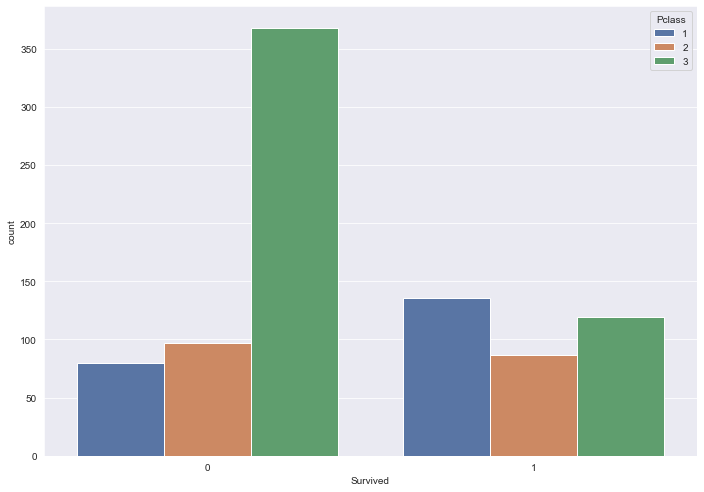

In [15]:
# countplot for survive and pcclass to know passenger in which class survived 
#sns.set({'figure.figsize':(11.7,8.27)})

sns.countplot(x="Survived", hue="Pclass", data=titanic_df)

# Inference : Majority of the PassengerS in class 3 didn't survive

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

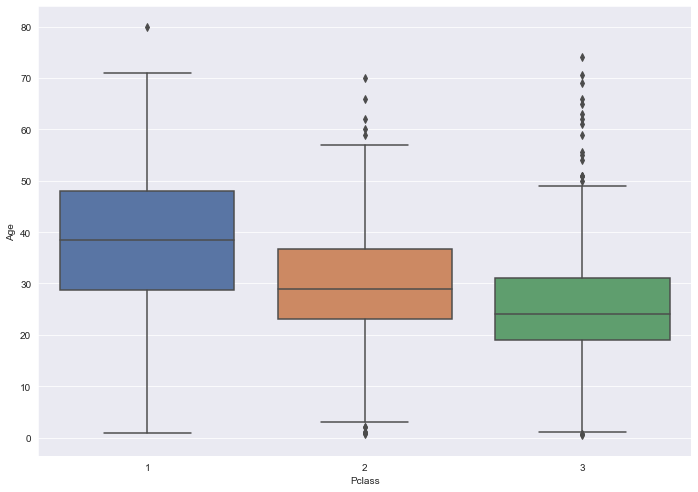

In [16]:
# Using a box plot will be plotting for PC class and age (check the outliers).
sns.boxplot(x="Pclass", y="Age", data= titanic_df)

# Inference : passengers travelling in Class 1 and class 2 are older than Class 3 

<AxesSubplot:ylabel='Frequency'>

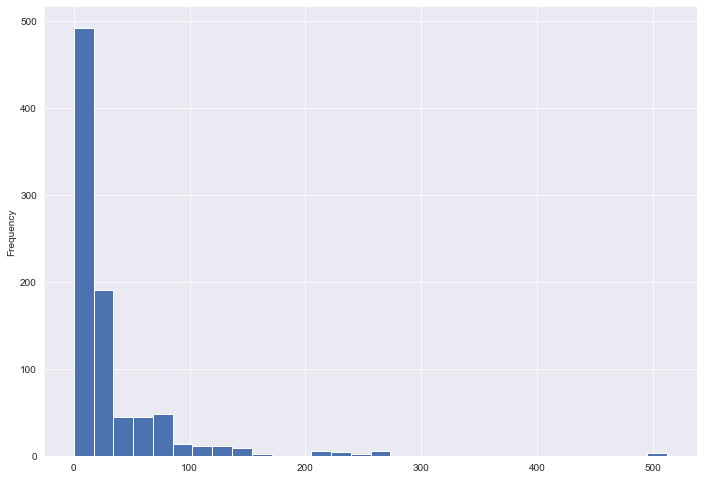

In [17]:
#  Plot a graph for fare
titanic_df["Fare"].plot.hist(bins=30)

#Inference: The fare was between 0 to 100

<AxesSubplot:xlabel='Siblings/Spouses Aboard', ylabel='count'>

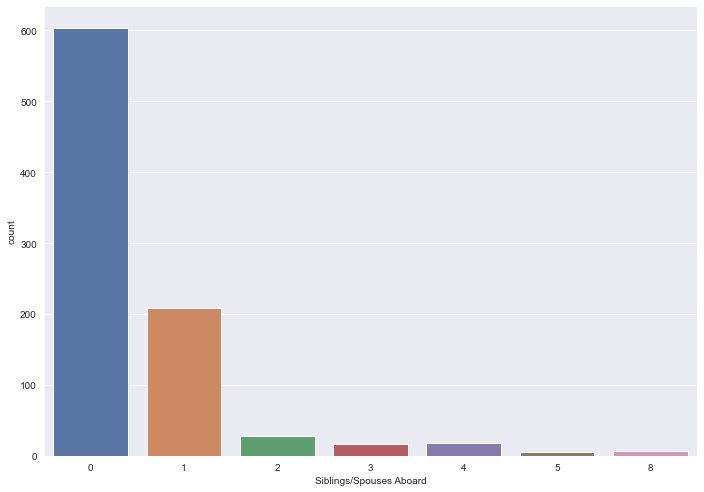

In [19]:
# plot the count plot for Siblings/Spouses Aboard 
sns.countplot(x="Siblings/Spouses Aboard", data=titanic_df)
              
# Inference : Max number of passengers were unaccompanied by any siblings/spouses.             

In [20]:
# Convert the "Sex" column into a categorical data  and drop the femalele column bas with Male column we cab know F/M

sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
# Convert the "pcclass" column  has 3 categories will try to revectorise it  as only will keep to two columns

pcl = pd.get_dummies(titanic_df['Pclass'], drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [22]:
# concat these  new column to the dataframe
titanic_df = pd.concat([titanic_df,sex,pcl],axis=1)
titanic_df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [23]:
# drop the redundant columns
titanic_df.drop(['Pclass','Name','Sex'], axis=1 , inplace=True)


In [24]:
# Check if the columns are dropped
titanic_df.head(5)

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


# Train Test the data - Model 1

In [25]:
x= titanic_df.drop("Survived", axis=1)
y= titanic_df["Survived"]


In [51]:
# split the data into train and test and assign 70% of the data for Trainning and 30% for Test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1) 

In [52]:
#import logistic regression model 
from sklearn.linear_model import LogisticRegression

# create an instance of logistic model
logmodel= LogisticRegression(solver='lbfgs', max_iter=1000)


In [53]:
# Fit the model

logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [54]:
# predict using the model
prediction = logmodel.predict(x_test)

In [55]:
# To know how the model is performing
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       162
           1       0.70      0.70      0.70       105

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction)

array([[130,  32],
       [ 31,  74]], dtype=int64)

In [58]:
# we will find the accuracy_score with the model where 70% of the data is assigned for Trainning and 30% for Test

from sklearn.metrics import accuracy_score

accuracy_score(y_test,prediction)*100

76.40449438202246

# Train Test the data - Model 2

In [64]:
# Applying another model where 80% of the data is assigned for Trainning and 20% for Test - Model2


x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1) 
logmodel2= LogisticRegression(solver='lbfgs', max_iter=1000) # max_iter to resolve the warning
logmodel2.fit(x_train,y_train)
prediction2 = logmodel2.predict(x_test)
print("Classification Report- Model 2 \n" , classification_report(y_test,prediction2))
print("\n  Confusion Matrix- Model 2 \n", confusion_matrix(y_test,prediction2))
accuracy2= accuracy_score(y_test,prediction2)*100
print ("\n The accuracy score - Model2 ( 80% Train  and 20% Test  is ) \n" ,accuracy2)



Classification Report- Model 2 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       106
           1       0.75      0.71      0.73        72

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178


  Confusion Matrix- Model 2 
 [[89 17]
 [21 51]]

 The accuracy score - Model2 ( 80% Train  and 20% Test  is ) 
 78.65168539325843


# Conclusion

In [ ]:
# With Model 1 : we have an accuracy score of 0.764 or 76.4% ,Precision value : 0.81 ,  Recall is also 0.80 

# With Model 2 we have an accuracy of 0.786 or 78.65% ,Precision value : 0.81 ,  Recall is also 0.84 

# Both the models are performing well as (Accuracy, Precision and Recall) are similar and high in each model

#Conclusion :

# Model 2 is a better model and we can say 79 % (after rounding) of people survived  and 21% of people were dead .
 